   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0


C:\Users\Dell\AppData\Local\Temp\ipykernel_8780\378789046.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby(["class", "survived"])


<Axes: xlabel='survived', ylabel='class'>

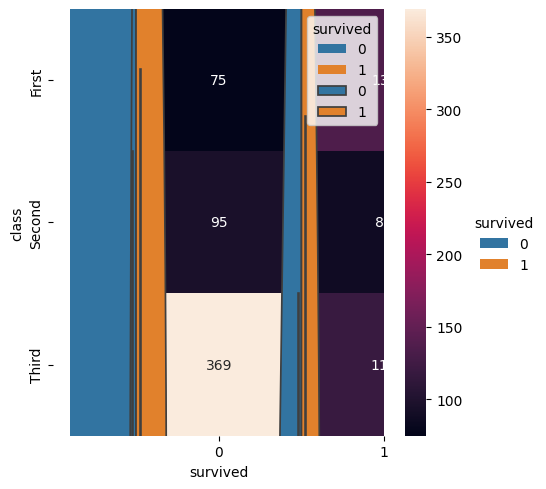

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset("titanic")

# Check the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values in the dataset
print(df.isnull().sum())

# Find outliers in the age column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
age_outliers = df[(df['age'] < Q1 - 1.5*IQR) | (df['age'] > Q3 + 1.5*IQR)]

# Find outliers in the fare column
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
fare_outliers = df[(df['fare'] < Q1 - 1.5*IQR) | (df['fare'] > Q3 + 1.5*IQR)]

# Remove rows containing outliers
df.drop(age_outliers.index, inplace=True)
#

# Check for missing values in the dataset after removing outliers
print(df.isnull().sum())

# Visualize the distribution of passengers by sex and survival status
sns.catplot(x="sex", hue="survived", kind="count", data=df)

# Visualize the distribution of passengers by passenger class and survival status
group = df.groupby(["class", "survived"])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")

# Visualize the distribution of passengers by age and survival status
sns.violinplot(x="sex", y="age", hue="survived", data=df, split=True)
